[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-0.95       -0.72777778 -0.50555556 -0.28333333 -0.06111111  0.16111111
  0.38333333  0.60555556  0.82777778]


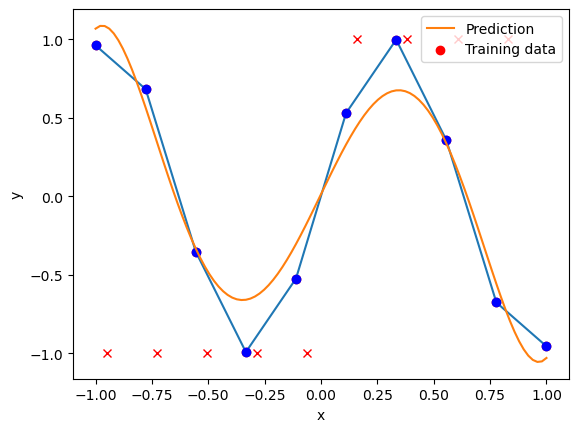

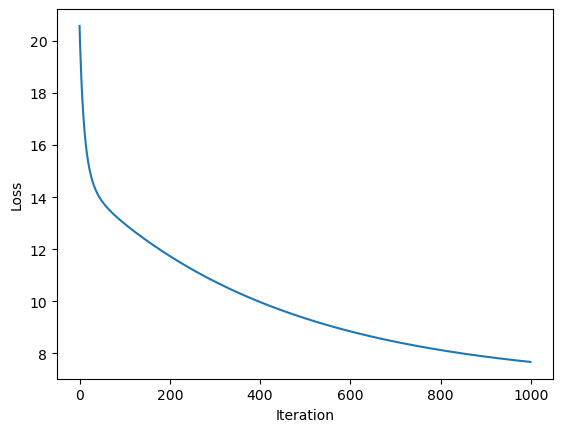

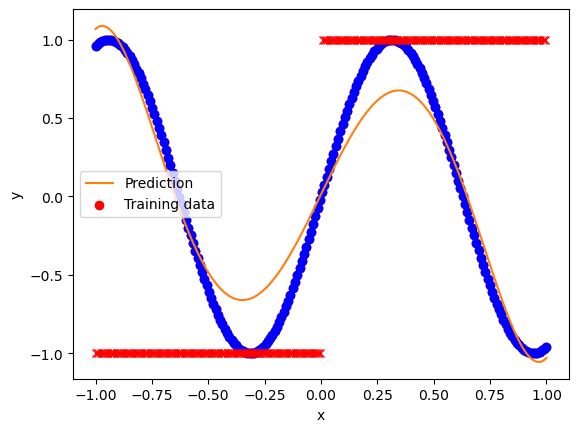

In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.special import expit

def phi(x, n):
    return np.power(x.reshape((-1 , 1)), np.arange(n))

# 用于计算 Sigmoid 函数
# 1 / (1 + e^(x))
def Phi(x):
    return expit(x)

def Phi_guassian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2) / (2 * np.power(sigma, 2))) / sigma * np.sqrt(2 * np.pi)


# f(w)
def f(w, a, t, b, s, alpha, beta, n):
    y1 = phi(a, n).dot(w)
    y2 = np.dot(phi(b, n), w)
    
    loss = - 0.5 * beta * np.sum(np.square(y1 - t)) # 第一项
    loss += np.sum(np.log(Phi(s * np.dot(phi(b, n), w))))
    loss -= 0.5 * alpha * np.sum(np.square(w))
    return loss

# 梯度
def grad_f(w, a, t, b, s, alpha, beta, n):
    # print(t.shape)
    y1 = np.dot(phi(a, n), w)
    y2 = s * Phi(s.dot(np.dot(phi(b, n), w)))

    grad1 = - beta * (phi(a, n).T.dot(y1 - t))
    grad2 = phi(b, n).T.dot(y2 - s)
    grad3 = - alpha * w

    return grad1 + grad2 + grad3

# 梯度下降算法
def gradient_descent(w0, a, t, b, s, alpha, beta, n, h, max_iter, callback=None):
    w = np.copy(w0)
    for _ in range(max_iter):
        grad = grad_f(w, a, t, b, s, alpha, beta, n)
        w += h * grad

        if callback is not None:
            loss = - f(w, a, t, b, s, alpha, beta, n)
            callback(w, loss)

    return w

# 回归训练集样本数
m = 10
# 噪声
e = rd.gauss(0, 0.03)
# 生成回归训练集
a = np.linspace(-1, 1, 10)
print(a)
t = np.sin(5 * a) + e

# m - 1 分类训练集样本数
# 生成分类训练集
b = np.linspace(-1, 1, m - 1)

for i in range (len(a) - 1):
    b[i] = a[i] + 0.5 / m
print(b)
y = np.sign(b + e)

# 定义超参数
alpha = 0.001
beta = 6.7

h = 0.02
max_iter = 1000

n = 7

w0 = np.zeros(phi(a, n).shape[1])

w = gradient_descent(w0,
                    a,
                    t,
                    b,
                    y,
                    alpha,
                    beta,
                    n,
                    h,
                    max_iter)


x = np.linspace(-1, 1, 100)
d = np.dot(phi(x, n), w)

plt.plot(a, t)
plt.plot(a, t, 'bo')
plt.plot(b, y, 'rx')
plt.plot(x, d, label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(a, t, c='r', label='Training data')
plt.legend()
plt.show()

# 绘制损失函数值的变化
def callback(w, loss):
    losses.append(loss)

losses = []
gradient_descent(w0,
                    a,
                    t,
                    b,
                    y,
                    alpha,
                    beta,
                    n,
                    h,
                    max_iter,
                    callback=callback)

x= np.array(range(len(losses)))

plt.plot(x, losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()



# 生成测试集
m = 200
# 生成回归测试集
a = np.linspace(-1, 1, m)

t = np.sin(5 * a)

# m - 1 分类训练集样本数
# 生成分类训练集
b = np.linspace(-1, 1, m - 1)

for i in range (len(a) - 1):
    b[i] = a[i] + 0.5 / m

y = np.sign(b)

d = np.dot(phi(a, n), w)

plt.plot(a, t)
plt.plot(a, t, 'bo')
plt.plot(b, y, 'rx')
plt.plot(a, d, label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(a, t, c='r', label='Training data')
plt.legend()
plt.show()



In [15]:
u = np.linspace(-1, 1, 7)
sigma = 0.3

# 高斯基函数
def phi(x, sigma):
    return np.exp(-np.power(x.reshape((-1 , 1)) - u, 2) / (2 * np.power(sigma, 2)))

x = np.linspace(-1, 1, 10)

# f2 = np.sum(np.log(Phi(s * np.dot(phi(b, n), w))))

print(x)
print(u)

print(phi(x, sigma))

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-1.         -0.66666667 -0.33333333  0.          0.33333333  0.66666667
  1.        ]
[[1.00000000e+00 5.39407507e-01 8.46579886e-02 3.86592014e-03
  5.13655312e-05 1.98575042e-07 2.23363144e-10]
 [7.60067205e-01 9.33712125e-01 3.33739780e-01 3.47085864e-02
  1.05026731e-03 9.24691246e-06 2.36879575e-08]
 [3.33739780e-01 9.33712125e-01 7.60067205e-01 1.80021743e-01
  1.24060036e-02 2.48755572e-04 1.45126829e-06]
 [8.46579886e-02 5.39407507e-01 1.00000000e+00 5.39407507e-01
  8.46579886e-02 3.86592014e-03 5.13655312e-05]
 [1.24060036e-02 1.80021743e-01 7.60067205e-01 9.33712125e-01
  3.33739780e-01 3.47085864e-02 1.05026731e-03]
 [1.05026731e-03 3.47085864e-02 3.33739780e-01 9.33712125e-01
  7.60067205e-01 1.80021743e-01 1.24060036e-02]
 [5.13655312e-05 3.86592014e-03 8.46579886e-02 5.39407507e-01
  1.00000000e+00 5.39407507e-01 8.46579886e-02]
 [1.45126829e-06 2.4